In [99]:
import os
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

### Text Summary

filtering out tos with less than 20 hightlighted sentence

In [33]:
path = 'Dataset for Text Summary Model/text_files/text_files_highlight'

In [136]:
def clean(content):
    #split the content of the file
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    content = tokenizer.tokenize(content)
    #add space before linebreaker
    content = [x.replace('\n', ' ') for x in content]
    #remove html tags
    content = [re.sub('<[^<]+?>', '', x) for x in content]
    #remove extra space
    content = [re.sub(' +', ' ', x) for x in content]
    content = [x.strip() for x in content]
    #remove the empty string
    content = [x for x in content if x != '']
    #keep only the first word capital
    content = [x.capitalize() for x in content]
    #drop duplicate
    content = set(content)
    return content       

In [162]:
def filter(constraint,save_csv=False):
    if not os.path.exists('Dataset for Text Summary Model/cleaned'):
            os.makedirs('Dataset for Text Summary Model/cleaned')
    output_path = 'Dataset for Text Summary Model/cleaned/more_than_'+str(constraint)+'_sentences'
    #create or reset the output folder
    if save_csv:
        #create the output folder if not exist
        if not os.path.exists(output_path+'/highlight'):
            os.makedirs(output_path+'/highlight')
        else:
            #remove all the files in the folder
            files = os.listdir(output_path+'/highlight')
            for file in files:
                os.remove(output_path+'/highlight/'+file)
        
        if not os.path.exists(output_path+'/original'):
            os.makedirs(output_path+'/original')
        else:
            files = os.listdir(output_path+'/original')
            for file in files:
                os.remove(output_path+'/original/'+file)
        
        if not os.path.exists(output_path+'/combined'):
            os.makedirs(output_path+'/combined')
        else:
            files = os.listdir(output_path+'/combined')
            for file in files:
                os.remove(output_path+'/combined/'+file)
                
    files = os.listdir(path)
    files = [x for x in files if x != '.DS_.txt']

    valid_files = []
    num_sentences_lst = []
    for file in files:
        #open the file
        with open(path+'/'+file, 'r',encoding="utf8") as f:
            #read the highlighted sentences
            content = f.read()
            #clean the highlighted sentences
            content = clean(content)
            #count the number of sentences
            num_sentences = len(content)
            num_sentences_lst.append(num_sentences)
            #if the number of sentence larger than the constraint
            if num_sentences > constraint:
                valid_files.append(file)
                #save cleaned sentences to csv
                tem = pd.DataFrame(content)
                #open original text
                with open('Dataset for Text Summary Model/text_files/text_files_raw'+'/'+file, 'r',encoding="utf8") as original:
                    original_txt = original.read()
                    #clean the original text and save to dataframe
                    original_txt = pd.DataFrame({'text':list(clean(original_txt))})
                    #create the combined dataframe
                    combined = original_txt.copy()
                    combined['highlighted'] = 0
                    #if the sentence is in the highlighted sentences, set highlighted to 1
                    for index, row in combined.iterrows():
                        if row['text'] in tem[0].values:
                            combined.loc[index,'highlighted'] = 1
                    #save to csv
                    if save_csv:
                        try:
                            tem.to_csv(output_path+'/highlight/'+file.replace('.txt','')+'.csv', index=False, header=False)
                            original_txt.to_csv(output_path+'/original/'+file.replace('.txt','')+'.csv', index=False)
                            combined.to_csv(output_path+'/combined/'+file.replace('.txt','')+'.csv', index=False)
                        except:
                            print('Problem in file: ', file, 'Skipping...')
                            continue

    return valid_files, num_sentences_lst

average number of hightlight sentences

In [138]:
valid_files, num_sentences_lst = filter(0)
np.array(num_sentences_lst).mean()

12.787321063394684

(array([196.,  79.,  69.,  34.,  32.,  25.,  14.,  10.,   2.,   7.,   5.,
          4.,   4.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.  ,   5.38,   9.76,  14.14,  18.52,  22.9 ,  27.28,  31.66,
         36.04,  40.42,  44.8 ,  49.18,  53.56,  57.94,  62.32,  66.7 ,
         71.08,  75.46,  79.84,  84.22,  88.6 ,  92.98,  97.36, 101.74,
        106.12, 110.5 , 114.88, 119.26, 123.64, 128.02, 132.4 , 136.78,
        141.16, 145.54, 149.92, 154.3 , 158.68, 163.06, 167.44, 171.82,
        176.2 , 180.58, 184.96, 189.34, 193.72, 198.1 , 202.48, 206.86,
        211.24, 215.62, 220.  ]),
 <BarContainer object of 50 artists>)

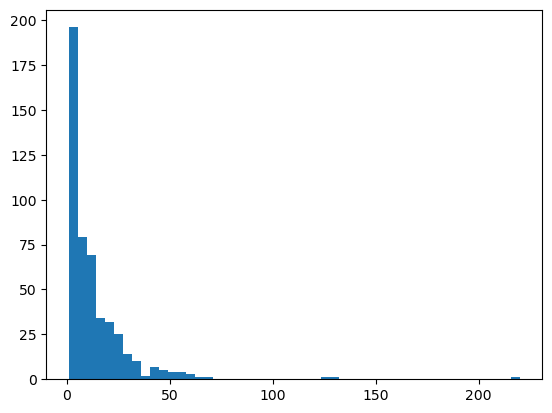

In [139]:
plt.hist(num_sentences_lst, bins=50)

only keep files with hightlight sentences more than average

In [164]:
valid_files, num_sentences_lst = filter(13,save_csv=True)

In [165]:
pd.read_csv('Dataset for Text Summary Model/cleaned/more_than_13_sentences/combined/23andMe_Terms of Service.csv').head(10)

,text,highlighted
0,You are responsible for maintaining the confid...,0
1,And a link to or such other means of identifyi...,0
2,You must pay for the service and any applicabl...,0
3,If your use of the services includes creating ...,1
4,And only a trained physician or other health c...,0
5,Agree you have no right to offer anyone else a...,0
6,The state of the understanding of genetic info...,0
7,"No advice or information, whether oral or writ...",0
8,"You should be aware that, if you are asked by ...",0
9,You also may be subject to additional terms an...,0
